In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/dsklifasovskiy/fa/FA_PBDA/lab1/Задание 1/german_credit_data.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
# Метод isna() возвращает DataFrame той же формы, что и исходный DataFrame, 
# но каждый элемент заменен на True (если элемент является пропущенным) или False (если элемент не пропущен).
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [4]:
# Заполняет пропущенные значения в двух столбцах 'Saving accounts' и 'Checking account' строкой 'none'.
for col in ['Saving accounts', 'Checking account']:
    df[col].fillna('none', inplace=True)

In [5]:
# Заменяет числовые значения в столбце 'Job' на соответствующие текстовые значения, используя словарь j.
j = {0: 'unskilled and non-res', 1: 'unskilled and res', 2: 'skilled', 3: 'highly skilled'}
df['Job'] = df['Job'].map(j)

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,none,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and res,own,little,none,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


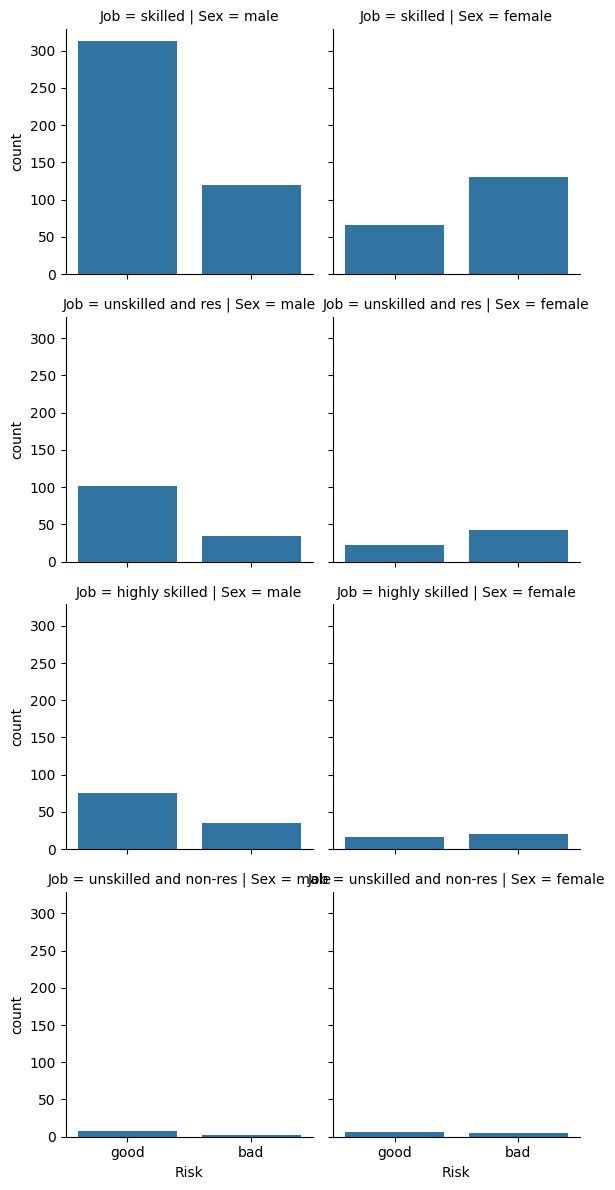

In [6]:
# Создает сетку графиков с помощью библиотеки seaborn. Графики в этой сетке показывают количество 
# клиентов каждого пола ("Sex") в каждой категории работы ("Job") в зависимости от риска ("Risk").

# Функция sns.countplot() используется для построения графика количества клиентов в каждой категории 
# риска ("Risk") для каждой комбинации "Sex" и "Job".

g = sns.FacetGrid(df, col="Sex",  row="Job")
g = g.map(sns.countplot, "Risk")

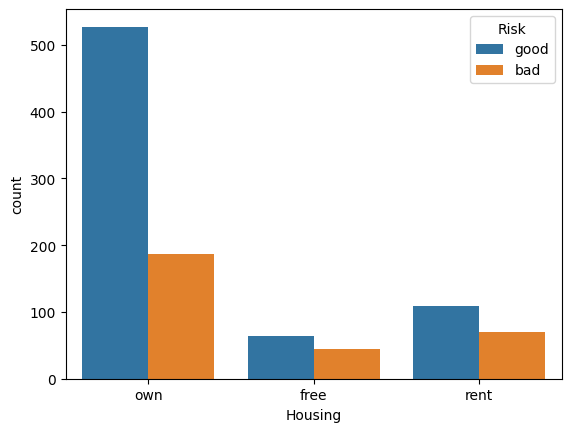

In [7]:
# Создает график количества клиентов (countplot) в зависимости от типа жилья ("Housing") и риска ("Risk").

sns.countplot(x="Housing", hue="Risk", data=df)
plt.show()

/var/folders/p7/hwdft5qn6yg2qv9hy4sc87z0ry3jnv/T/ipykernel_6115/1466254135.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


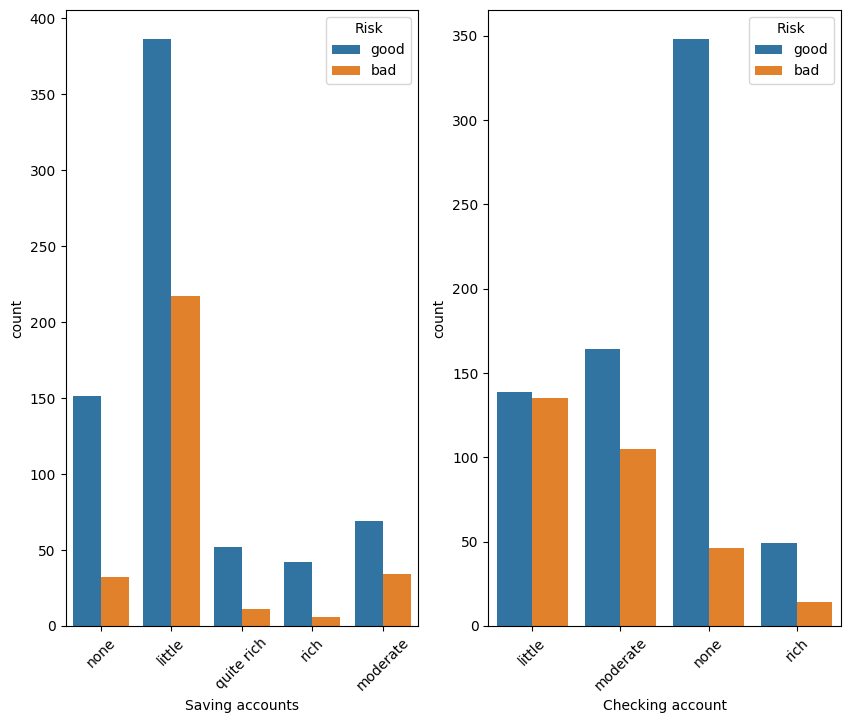

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
sns.countplot(x="Saving accounts", hue="Risk", data=df, ax=ax1)
sns.countplot(x="Checking account", hue="Risk", data=df, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


fig.show()

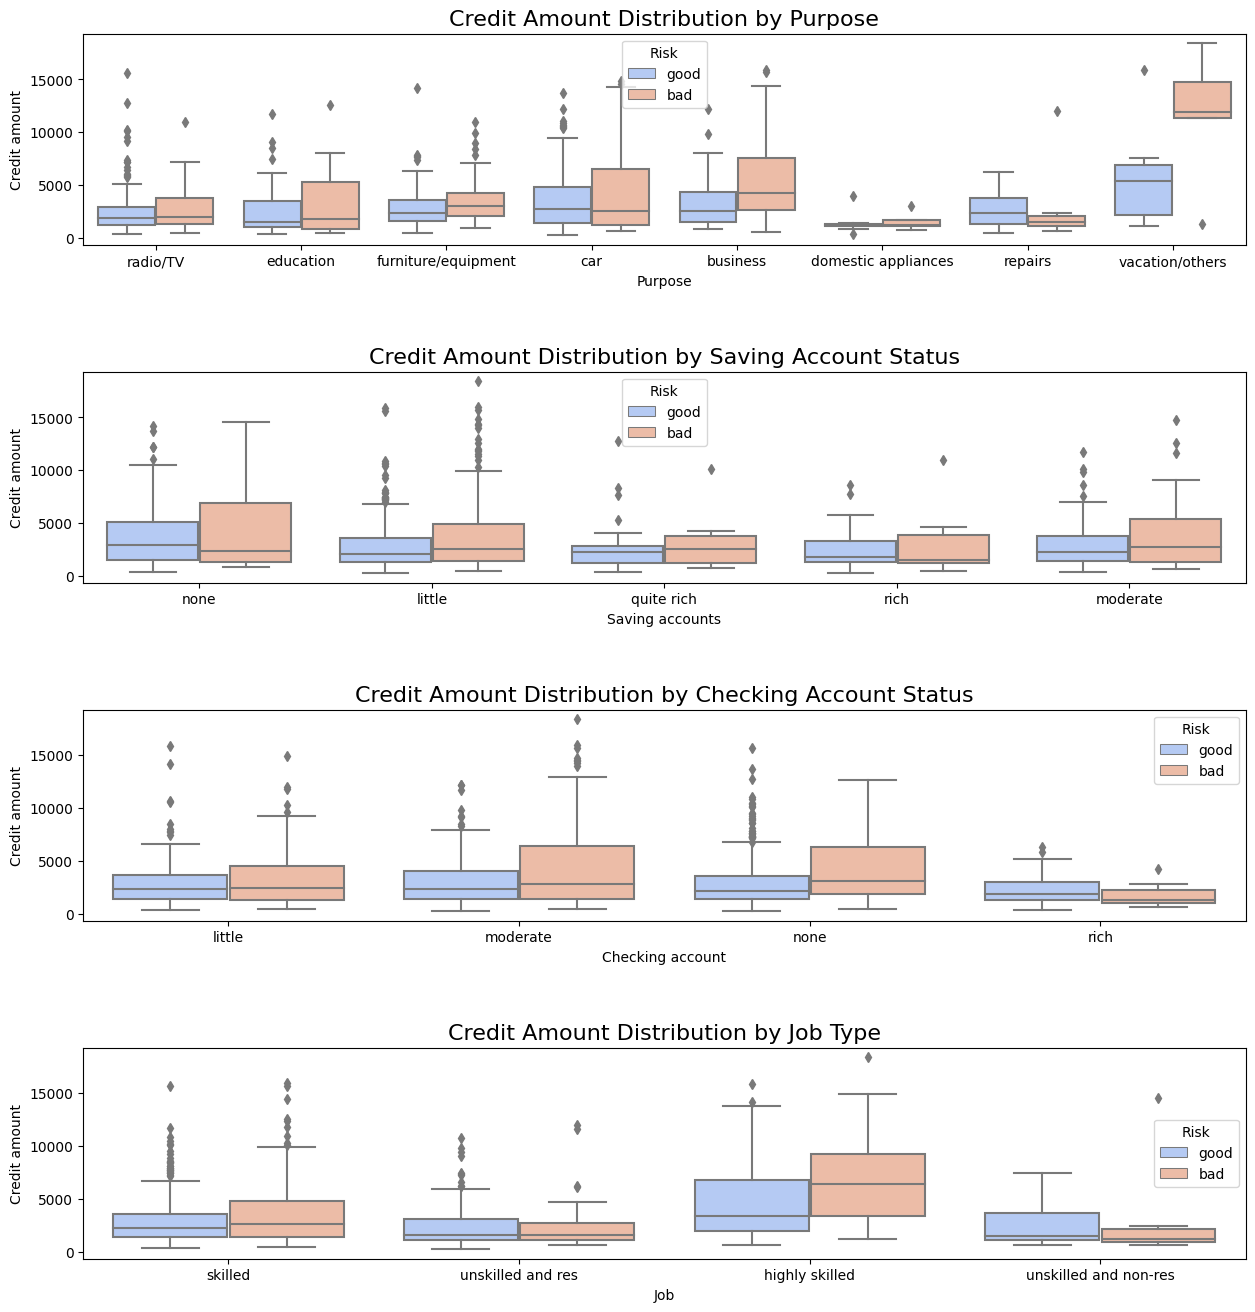

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,25))

sns.boxplot(x="Purpose", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.boxplot(x="Saving accounts", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)
sns.boxplot(x="Checking account", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax3)
sns.boxplot(x="Job", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax4)

ax1.set_title("Credit Amount Distribution by Purpose", fontsize=16)
ax2.set_title("Credit Amount Distribution by Saving Account Status", fontsize=16)
ax3.set_title("Credit Amount Distribution by Checking Account Status", fontsize=16)
ax4.set_title("Credit Amount Distribution by Job Type", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

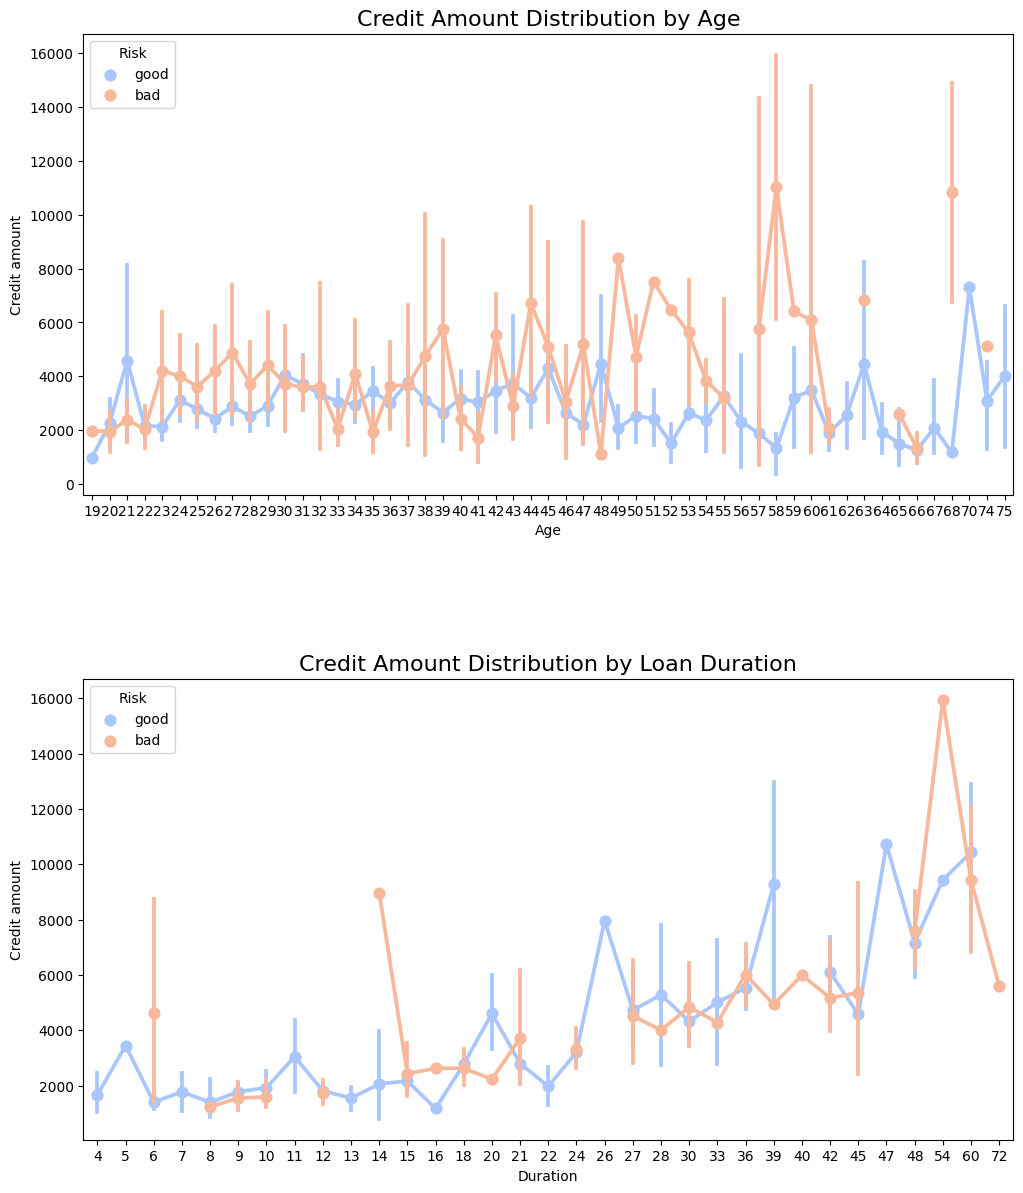

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,14))

sns.pointplot(x="Age", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.pointplot(x="Duration", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)

ax1.set_title("Credit Amount Distribution by Age", fontsize=16)
ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=16)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

In [11]:
# кодирование категориальных переменных в виде дамми-переменных с помощью функции pd.get_dummies()
# getting dummies for all the categorical variables
dummies_columns = ['Job', 'Purpose', 'Sex', 'Housing', 'Saving accounts', 'Checking account']
for col in dummies_columns:
    df = df.merge(pd.get_dummies(df[col], drop_first=True, prefix=str(col)), left_index=True, right_index=True) 

# преобразует значение риска (Risk) в бинарный формат
# encoding risk as binary
r = {"good":0, "bad": 1}
df['Risk'] = df['Risk'].map(r)

# удаляет столбцы, которые больше не нужны для моделирования, такие как Job, Purpose, Sex, 
# Housing, Saving accounts и Checking account,
# drop redundant variables
columns_to_drop = ['Job', 'Purpose','Sex','Housing','Saving accounts','Checking account']
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()

,Age,Credit amount,Duration,Risk,Job_skilled,Job_unskilled and non-res,Job_unskilled and res,Purpose_car,Purpose_domestic appliances,Purpose_education,...,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_none,Checking account_rich
0,67,1169,6,0,True,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
1,22,5951,48,1,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,49,2096,12,0,False,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,45,7882,42,0,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,53,4870,24,1,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [12]:
# train_test_split - используется для разделения данных на тренировочную и тестовую выборки.
# KFold - класс, который реализует скользящий контроль для оценки качества модели.
# cross_val_score - используется для оценки качества модели с помощью скользящего контроля.
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# accuracy_score - вычисляет точность классификации.
# confusion_matrix - вычисляет матрицу ошибок для классификатора.
# classification_report - выводит отчет о классификации, включая точность, полноту и F-меру.
# fbeta_score - вычисляет F-меру для заданного параметра beta.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score

# GridSearchCV - используется для настройки параметров модели на основе сетки.
# RandomizedSearchCV - используется для настройки параметров модели на основе случайного поиска.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# RandomForestClassifier - классификатор на основе случайного леса.
from sklearn.ensemble import RandomForestClassifier

# LogisticRegression - классификатор на основе логистической регрессии.
# LinearRegression - регрессор на основе линейной регрессии.
from sklearn.linear_model import LogisticRegression, LinearRegression

# KNeighborsClassifier - классификатор на основе метода ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

# SVC - классификатор на основе метода опорных векторов
from sklearn.svm import SVC

# XGBClassifier - классификатор на основе градиентного бустинга деревьев решений
from xgboost import XGBClassifier

# GaussianNB - классификатор на основе наивного байесовского алгоритма
from sklearn.naive_bayes import GaussianNB

In [13]:
# разделение данных на тренировочный и тестовый датасеты. Входные данные (X) представляют 
# все столбцы кроме 'Risk' и 'Credit amount', а выходные данные (y) представляют только столбец 'Risk'.

X = df.drop(['Risk', 'Credit amount'], axis=1).values
y = df['Risk'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [14]:
# обучение модели логистической регрессии на тренировочных данных
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)

# доля правильных ответов модели на тестовой выборке
print(accuracy_score(y_pred_log, y_test))
print('-' * 60)

# матрица ошибок, которая показывает, сколько объектов каждого класса было верно/неверно предсказано.
print(confusion_matrix(y_test, y_pred_log))
print('-' * 60)

# отчет о классификации, который показывает основные метрики для каждого класса: precision, recall, f1-score и support.
print(classification_report(y_test, y_pred_log))

0.74
------------------------------------------------------------
[[126  15]
 [ 37  22]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       141
           1       0.59      0.37      0.46        59

    accuracy                           0.74       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.74      0.72       200



/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# создаем модель KNeighborsClassifier с параметром n_neighbors=1, что означает, что для каждого 
# тестового объекта мы будем использовать только одного ближайшего соседа из обучающей выборки для определения его класса. 
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_pred_knn, y_test))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.685
[[116  25]
 [ 38  21]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       141
           1       0.46      0.36      0.40        59

    accuracy                           0.69       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.67      0.69      0.67       200



In [16]:
svc = SVC(kernel='linear', gamma=10, C=0.8)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(accuracy_score(y_pred_svc, y_test))
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.74
[[126  15]
 [ 37  22]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       141
           1       0.59      0.37      0.46        59

    accuracy                           0.74       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.74      0.72       200



In [17]:
rf = RandomForestClassifier(max_depth=9, max_features=15, min_samples_leaf=5, n_estimators=25)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_pred_rf, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.735
[[125  16]
 [ 37  22]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       141
           1       0.58      0.37      0.45        59

    accuracy                           0.73       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.71      0.73      0.72       200



In [18]:
xgb = XGBClassifier(eta=0.19, max_depth=8, n_estimators=150, subsample=0.8, colsample_bytree=1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_pred_xgb, y_test))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/Users/dsklifasovskiy/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.75
[[120  21]
 [ 29  30]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       141
           1       0.59      0.51      0.55        59

    accuracy                           0.75       200
   macro avg       0.70      0.68      0.69       200
weighted avg       0.74      0.75      0.74       200



### GridSearchCV и RandomizedSearchCV для KNeighborsClassifier

In [28]:
# Создаем модель KNeighborsClassifier
knn_gs = KNeighborsClassifier()

# Задаем список значений гиперпараметра "n_neighbors"
param_grid_knn_gs = {'n_neighbors': range(1, 10)}

# Используем GridSearchCV для поиска оптимальных значений гиперпараметров
grid_search_knn = GridSearchCV(knn_gs, param_grid_knn_gs, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Выводим наилучшее значение гиперпараметра и соответствующую точность
print("Best parameter: ", grid_search_knn.best_params_)
print("Best accuracy: ", grid_search_knn.best_score_)
print(classification_report(y_test, grid_search_knn.predict(X_test)))

Best parameter:  {'n_neighbors': 8}
Best accuracy:  0.70625
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       141
           1       0.47      0.14      0.21        59

    accuracy                           0.70       200
   macro avg       0.60      0.54      0.51       200
weighted avg       0.65      0.70      0.64       200



In [29]:
# Создаем модель KNeighborsClassifier
knn_rs = KNeighborsClassifier()

# Задаем диапазон значений гиперпараметра "n_neighbors"
param_dist_rs = {'n_neighbors': np.arange(1, 20, 2)}

# Используем RandomizedSearchCV для поиска оптимальных значений гиперпараметров
random_search_knn = RandomizedSearchCV(knn_rs, param_distributions=param_dist_rs, cv=5, n_iter=5, random_state=42, scoring='accuracy')
random_search_knn.fit(X_train, y_train)

# Выводим наилучшее значение гиперпараметра и соответствующую точность
print("Best parameter: ", random_search_knn.best_params_)
print("Best accuracy: ", random_search_knn.best_score_)
print(classification_report(y_test, random_search_knn.predict(X_test)))

Best parameter:  {'n_neighbors': 15}
Best accuracy:  0.7162499999999999
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       141
           1       0.37      0.12      0.18        59

    accuracy                           0.68       200
   macro avg       0.54      0.52      0.49       200
weighted avg       0.61      0.68      0.62       200



### GridSearchCV и RandomizedSearchCV для RandomForestClassifier

In [34]:
# n_estimators: количество деревьев в случайном лесе.
# max_depth: максимальная глубина дерева. Ограничивает глубину каждого дерева, чтобы избежать переобучения. 
# min_samples_split: минимальное количество объектов, которое должно быть в листе, чтобы можно было разделить узел. 
# min_samples_leaf: минимальное количество объектов, которое должно быть в листе. 
# max_features: число признаков, которые будут рассмотрены при поиске лучшего разделения. 
param_grid_gs = {
    'n_estimators': [10, 25, 50, 75, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rfc_gs = RandomForestClassifier()

grid_search_rfc = GridSearchCV(estimator=rfc_gs, param_grid=param_grid_gs, cv=5)
grid_search_rfc.fit(X_train, y_train)

# Выводим наилучшее значение гиперпараметра и соответствующую точность
print("Best parameter: ", grid_search_rfc.best_params_)
print("Best accuracy: ", grid_search_rfc.best_score_)
print(classification_report(y_test, grid_search_rfc.predict(X_test)))

Best parameter:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.7362500000000001
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       141
           1       0.68      0.36      0.47        59

    accuracy                           0.76       200
   macro avg       0.73      0.64      0.66       200
weighted avg       0.75      0.76      0.73       200



In [35]:
param_dist_rs = {
    'n_estimators': [10, 25, 50, 75, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

rfc_rs = RandomForestClassifier()

random_search_rfc = RandomizedSearchCV(
    estimator=rfc_rs,
    param_distributions=param_dist_rs,
    n_iter=10, # количество итераций случайного поиска
    cv=5
)
random_search_rfc.fit(X_train, y_train)

# Выводим наилучшее значение гиперпараметра и соответствующую точность
print("Best parameter: ", random_search_rfc.best_params_)
print("Best accuracy: ", random_search_rfc.best_score_)
print(classification_report(y_test, random_search_rfc.predict(X_test)))

Best parameter:  {'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best accuracy:  0.72875
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       141
           1       0.63      0.37      0.47        59

    accuracy                           0.75       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73      0.75      0.73       200



### GridSearchCV и RandomizedSearchCV для LogisticRegression

In [73]:
# Сетка параметров для GridSearchCV
# C: Обратная сила регуляризации. Меньшие значения C соответствуют сильной регуляризации.
# max_iter: Максимальное количество итераций для сходимости алгоритма оптимизации.
# fit_intercept: Определяет, должен ли быть расчет свободного члена
param_grid_gs = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 2500],
    'fit_intercept': [True, False],
}

# Создание модели
logreg_gs = LogisticRegression()

# Создание объекта GridSearchCV
grid_search_lr = GridSearchCV(estimator=logreg_gs, param_grid=param_grid_gs, cv=5)

# Обучение модели
grid_search_lr.fit(X_train, y_train)

# Вывод наилучших параметров
print("Best parameters: ", grid_search_lr.best_params_)
print("Best accuracy: ", grid_search_lr.best_score_)
print(classification_report(y_test, grid_search_lr.predict(X_test)))

Best parameters:  {'C': 10, 'fit_intercept': True, 'max_iter': 500}
Best accuracy:  0.73625
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       141
           1       0.61      0.39      0.47        59

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.73       200



In [74]:
param_dist_rfc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 2500],
    'fit_intercept': [True, False],
}

# Создаем модель
logreg_rfc = LogisticRegression()

# Создаем объект для случайного поиска
random_search_lr = RandomizedSearchCV(
    estimator=logreg_rfc,
    param_distributions=param_dist_rfc,
    n_iter=10,
    cv=5,
)

# Обучаем модель
random_search_lr.fit(X_train, y_train)

# Выводим наилучшие параметры
print("Best parameters: ", random_search_lr.best_params_)
print("Best accuracy: ", random_search_lr.best_score_)
print(classification_report(y_test, random_search_lr.predict(X_test)))

Best parameters:  {'max_iter': 2500, 'fit_intercept': True, 'C': 10}
Best accuracy:  0.73625
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       141
           1       0.61      0.39      0.47        59

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.73      0.74      0.73       200

